# Домашнее задание 3. 

## Предсказание пользовательской оценки отеля по тексту отзыва.

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву. Данные можно скачать [тут](https://www.kaggle.com/c/hseds-texts-2020/data?select=train.csv).

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 1. В противном случае мы будем вынуждены не засчитать задание :( 

Для измерения качества вашей модели используйте разбиение данных на train и test и замеряйте качество на тестовой части.

#### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

Удачи! 💪

#### Использовать внешние данные для обучения строго запрещено. Можно использовать предобученные модели из torchvision.

In [ ]:
PATH_TO_TRAIN_DATA = 'train.csv' # файл загружал через "загрузку в сессионное хранилище"

In [ ]:
import pandas as pd

df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


Предобработка текста может сказываться на качестве вашей модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру. 
Однако можно не ограничиваться этим набором преобразований. Подумайте, что еще можно сделать с текстами, чтобы помочь будущим моделям? Добавьте преобразования, которые могли бы помочь по вашему мнению.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

In [ ]:
import string

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def process_text(text):
    return [word for word in word_tokenize(text.lower()) if word not in string.punctuation]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
########## SVOYI DOBAVLENIYA ########
df_my = df

In [ ]:
#df['negative'] = df['negative'].apply(process_text) because TfidfVectorizer works with strings, not tokens.
#df['positive'] = df['positive'].apply(process_text)

In [ ]:
from sklearn.model_selection import train_test_split

#df_train, df_test = train_test_split(df)

In [ ]:
df_train, df_test = train_test_split(df_my, train_size=30000, test_size=10000, shuffle=False)

### Часть 1. 1 балл

Обучите логистическую регрессию на TF-IDF векторах текстов.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.metrics import mean_absolute_error

In [ ]:
df_train['positive'] = 'positive: ' + df_train['positive'] + ' ' + df_train['negative'] + ' negative.' # concatenation two rows 
# into one (positive).
df_test['positive'] = 'positive: ' + df_test['positive'] + ' ' + df_test['negative'] + ' negative.'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(df_train['positive']) # series type
test_x = vectorizer.transform(df_test['positive'])

In [ ]:
train_y = df_train['score']
test_y = df_test['score']

In [ ]:
train_x = train_x.toarray() # sparse matrix to array
test_x = test_x.toarray()

In [ ]:
train_y = train_y.to_numpy() # series to array
test_y = test_y.to_numpy()

In [ ]:
train_y = np.around(train_y)

In [ ]:
train_y = train_y.astype(int)

У меня fit работает примерно 5 минут.

In [ ]:
log_reg = LogisticRegression().fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
pred = log_reg.predict(test_x)

In [ ]:
mean_absolute_error(test_y, pred)

0.97445

### Часть 2. 3 балла

Обучите логистическую регрессию на усредненных Word2Vec векторах. 

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
df = pd.read_csv(PATH_TO_TRAIN_DATA)

df['positive'] = 'positive: ' + df['positive'] + ' ' + df['negative'] + ' negative.' # concatenation two rows into one (positive).

df['positive'] = df['positive'].apply(process_text)

df_train, df_test = train_test_split(df, train_size=30000, test_size=10000, shuffle=False)

In [ ]:
train_x = df_train['positive'] 
test_x = df_test['positive']

train_y = df_train['score']
test_y = df_test['score']

In [ ]:
train_y = train_y.to_numpy() # series to array
test_y = test_y.to_numpy()

In [ ]:
train_y = np.around(train_y)
train_y = train_y.astype(int)

In [ ]:
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()

In [ ]:
emb_size = 300

Следующая функция, считающая векторы для каждого слова из словаря, у меня работает минуты 2. Ее параметры позволяют получить приемлемое качество. 

In [ ]:
model = Word2Vec(sentences=train_x, size=emb_size, sg=1, hs=1, window=11, iter=8, sample=0.001, alpha=0.030, min_count=3, min_alpha=0.0001, max_vocab_size=15000)

In [ ]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
words = np.array(list(model.wv.vocab))

Далее - два цикла, где усредняются вектора в каждом предложении (отзыве). Длится это все минуты четыре.

In [ ]:
train_X = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  train_X[i] = x / c
  if np.isnan(train_X[i]).any():
    train_X[i] = np.zeros((emb_size,))

test_X = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  test_X[i] = x / c
  if np.isnan(test_X[i]).any():
    test_X[i] = np.zeros((emb_size,))

In [ ]:
log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
pred = log_reg.predict(test_X)

In [ ]:
mean_absolute_error(test_y, pred)

0.97896

Создаю массив со значениями длины эмбеддинга (для трех значений: 100, 300, 500) и с лоссами для каждого значения эмбеддинга для модели с единичными весами (пока нули).

In [ ]:
emp_seq = [100, 300, 500]
qual_zeroweight = [0, 0, 0]

In [ ]:
qual_zeroweight[1] = mean_absolute_error(test_y, pred)

In [ ]:
mean_absolute_error(test_y, pred)

0.9869399999999999

Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

Далее - функция для подсчета весов (вес для каждого слова - от 0,0001 до трёх, с учетом размера трейна = 30000). Работает не мало, примерно 4 минуты.

In [ ]:
def calc_idf(texts, vocab):
    weights = np.zeros((len(vocab), ))
    for j in range(len(vocab)):
      freq = 0
      for i in range(len(texts)):
        if vocab[j] in texts[i]:
          freq += 1
      weights[j] = len(texts) / freq
    weights = weights / 10000
    return weights

we = calc_idf(train_x, words)

Прошу прощения за повторяющиеся куски кода дальше, это можно было бы красивее оформить функциями, но времени не хватило.

In [ ]:
emb_size = 100
model = Word2Vec(sentences=train_x, size=emb_size, sg=1, hs=1, window=11, iter=8, sample=0.001, alpha=0.030, min_count=3, min_alpha=0.0001, max_vocab_size=15000)
X = model[model.wv.vocab]
words = np.array(list(model.wv.vocab))

train_XX = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + we[np.where(words == word)[0][0]]*X[np.where(words == word)[0][0]]
      c += 1
  train_XX[i] = x / c
  if np.isnan(train_XX[i]).any():
    train_XX[i] = np.zeros((emb_size,))

test_XX = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + we[np.where(words == word)[0][0]]*X[np.where(words == word)[0][0]]
      c += 1
  test_XX[i] = x / c
  if np.isnan(test_XX[i]).any():
    test_XX[i] = np.zeros((emb_size,))

log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_XX, train_y)
pred_XX = log_reg.predict(test_XX)
mean_absolute_error(test_y, pred_XX)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.4048200000000002

На этом моменте я решил, что показать лоссы для четырех значений размера эмбеддинга (100, 200, 300, 500) будет нагляднее, чем для трех, поэтому создается массив из четырех элементов (для модели с гибкими весами).

In [ ]:
qual_flexweight = [0, 0, 0, 0]
qual_flexweight[0] = mean_absolute_error(test_y, pred_XX)

In [ ]:
emb_size = 200
model = Word2Vec(sentences=train_x, size=emb_size, sg=1, hs=1, window=11, iter=8, sample=0.001, alpha=0.030, min_count=3, min_alpha=0.0001, max_vocab_size=15000)
X = model[model.wv.vocab]
words = np.array(list(model.wv.vocab))

train_XX = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + we[np.where(words == word)[0][0]]*X[np.where(words == word)[0][0]]
      c += 1
  train_XX[i] = x / c
  if np.isnan(train_XX[i]).any():
    train_XX[i] = np.zeros((emb_size,))

test_XX = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + we[np.where(words == word)[0][0]]*X[np.where(words == word)[0][0]]
      c += 1
  test_XX[i] = x / c
  if np.isnan(test_XX[i]).any():
    test_XX[i] = np.zeros((emb_size,))

log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_XX, train_y)
pred_XX = log_reg.predict(test_XX)
mean_absolute_error(test_y, pred_XX)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.39682

In [ ]:
qual_flexweight[1] = mean_absolute_error(test_y, pred_XX)

In [ ]:
emb_size = 300
model = Word2Vec(sentences=train_x, size=emb_size, sg=1, hs=1, window=11, iter=8, sample=0.001, alpha=0.030, min_count=3, min_alpha=0.0001, max_vocab_size=15000)
X = model[model.wv.vocab]
words = np.array(list(model.wv.vocab))

train_XX = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + we[np.where(words == word)[0][0]]*X[np.where(words == word)[0][0]]
      c += 1
  train_XX[i] = x / c
  if np.isnan(train_XX[i]).any():
    train_XX[i] = np.zeros((emb_size,))

test_XX = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + we[np.where(words == word)[0][0]]*X[np.where(words == word)[0][0]]
      c += 1
  test_XX[i] = x / c
  if np.isnan(test_XX[i]).any():
    test_XX[i] = np.zeros((emb_size,))

log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_XX, train_y)
pred_XX = log_reg.predict(test_XX)
mean_absolute_error(test_y, pred_XX)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.39178

In [ ]:
qual_flexweight[2] = mean_absolute_error(test_y, pred_XX)

In [ ]:
emb_size = 500
model = Word2Vec(sentences=train_x, size=emb_size, sg=1, hs=1, window=11, iter=8, sample=0.001, alpha=0.030, min_count=3, min_alpha=0.0001, max_vocab_size=15000)
X = model[model.wv.vocab]
words = np.array(list(model.wv.vocab))

train_XX = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + we[np.where(words == word)[0][0]]*X[np.where(words == word)[0][0]]
      c += 1
  train_XX[i] = x / c
  if np.isnan(train_XX[i]).any():
    train_XX[i] = np.zeros((emb_size,))

test_XX = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + we[np.where(words == word)[0][0]]*X[np.where(words == word)[0][0]]
      c += 1
  test_XX[i] = x / c
  if np.isnan(test_XX[i]).any():
    test_XX[i] = np.zeros((emb_size,))

log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_XX, train_y)
pred_XX = log_reg.predict(test_XX)
mean_absolute_error(test_y, pred_XX)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.39852

In [ ]:
qual_flexweight[3] = mean_absolute_error(test_y, pred_XX)

In [ ]:
emb_size = 500
model = Word2Vec(sentences=train_x, size=emb_size, sg=1, hs=1, window=11, iter=8, sample=0.001, alpha=0.030, min_count=3, min_alpha=0.0001, max_vocab_size=15000)
X = model[model.wv.vocab]
words = np.array(list(model.wv.vocab))

train_X = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  train_X[i] = x / c
  if np.isnan(train_X[i]).any():
    train_X[i] = np.zeros((emb_size,))

test_X = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  test_X[i] = x / c
  if np.isnan(test_X[i]).any():
    test_X[i] = np.zeros((emb_size,))

log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_X, train_y)
pred = log_reg.predict(test_X)
mean_absolute_error(test_y, pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9847

In [ ]:
qual_zeroweight[2] = mean_absolute_error(test_y, pred)

In [ ]:
emb_size = 100
model = Word2Vec(sentences=train_x, size=emb_size, sg=1, hs=1, window=11, iter=8, sample=0.001, alpha=0.030, min_count=3, min_alpha=0.0001, max_vocab_size=15000)
X = model[model.wv.vocab]
words = np.array(list(model.wv.vocab))

train_X = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  train_X[i] = x / c
  if np.isnan(train_X[i]).any():
    train_X[i] = np.zeros((emb_size,))

test_X = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  test_X[i] = x / c
  if np.isnan(test_X[i]).any():
    test_X[i] = np.zeros((emb_size,))

log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_X, train_y)
pred = log_reg.predict(test_X)
mean_absolute_error(test_y, pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0123000000000002

In [ ]:
qual_zeroweight[0] = mean_absolute_error(test_y, pred)

In [ ]:
emb_size = 200
model = Word2Vec(sentences=train_x, size=emb_size, sg=1, hs=1, window=11, iter=8, sample=0.001, alpha=0.030, min_count=3, min_alpha=0.0001, max_vocab_size=15000)
X = model[model.wv.vocab]
words = np.array(list(model.wv.vocab))

train_X = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  train_X[i] = x / c
  if np.isnan(train_X[i]).any():
    train_X[i] = np.zeros((emb_size,))

test_X = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  test_X[i] = x / c
  if np.isnan(test_X[i]).any():
    test_X[i] = np.zeros((emb_size,))

log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_X, train_y)
pred = log_reg.predict(test_X)
mean_absolute_error(test_y, pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9937800000000001

Т.к. к этому моменту уже решено делать график для четырех значений длины эмбеддинга, то необходимо создать новый массив (для модели с единичными весами), дополнить одним посчитанным только что лоссом и переписать туда уже полученные для модели лоссы.

In [ ]:
qual_zerowe = [0, 0, 0, 0]
qual_zerowe[1] = mean_absolute_error(test_y, pred)

In [ ]:
qual_zerowe[0] = qual_zeroweight[0]
qual_zerowe[2] = qual_zeroweight[1]
qual_zerowe[3] = qual_zeroweight[2]

Проведите эксперименты с размерностью эмбеддинга. Для каждого из двух методов постройте график зависимости качества модели от размерности эмбеддинга. 

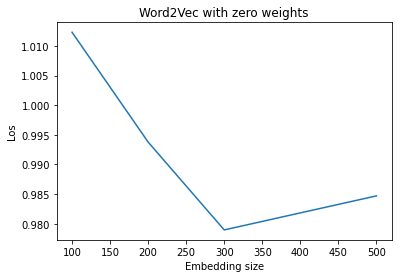

In [ ]:
import matplotlib.pyplot as plt  
  
x = [100, 200, 300, 500]   
plt.plot(x, qual_zerowe)  
plt.xlabel('Embedding size')    
plt.ylabel('Los') # Loss* 
plt.title('Word2Vec with zero weights') # опечатка: это не zero weights, а единичные weights 
plt.show()  

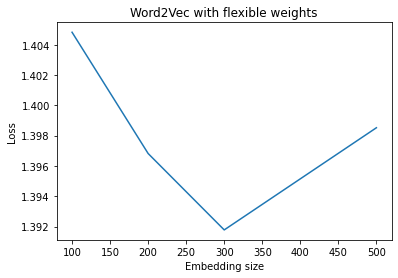

In [ ]:
x = [100, 200, 300, 500] 
plt.plot(x, qual_flexweight)  
plt.xlabel('Embedding size')    
plt.ylabel('Loss')  
plt.title('Word2Vec with flexible weights')  
plt.show()

#### Сделайте выводы:

Качество на взвешенных word2vec явно хуже, чем при единичных весах. Это может показаться странным, тк более редкие слова при гибких весах сильнее влияют на предсказание. Однако, если для положительной или отрицательной характеристики клиенты используют одни и те же слова, описывая разные особенности или детали отелей (например: great, bad, comfortable, fabulous, tremendous, awful), то уже эти слова-характеристики будут иметь более однозначное значение, повторяясь довольно часто. 

Оптимальный размер вектора = 300 для обоих вариантов весов. По всей видимости, именно при таком размере вектора для отзывов, похоже описывающих отель (и имеющих похожие оценки), все еще похожи друг на друга, но уже не похожи на вектора отзывов, описывающих отель по-другому (имеющих иные оценки).

Теперь попробуйте обучить логистическую регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.

In [ ]:
from gensim.models import FastText
# from gensim.models.wrappers import Wordrank

In [ ]:
emb_size = 300
model_fast = FastText(sentences=train_x, size=emb_size, window=8, sg=1, hs=1, iter=7)

In [ ]:
X = model_fast[model_fast.wv.vocab]
words = np.array(list(model_fast.wv.vocab))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
train_XXX = np.zeros((len(train_x), emb_size,))
for i in range(len(train_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in train_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  train_XXX[i] = x / c
  if np.isnan(train_XXX[i]).any():
    train_XXX[i] = np.zeros((emb_size,))

test_XXX = np.zeros((len(test_x), emb_size,))
for i in range(len(test_x)):
  x = np.zeros((emb_size,))
  c = 0
  for word in test_x[i]:
    if word in words:
      x = x + X[np.where(words == word)[0][0]]
      c += 1
  test_XXX[i] = x / c
  if np.isnan(test_XXX[i]).any():
    test_XXX[i] = np.zeros((emb_size,))

In [ ]:
log_reg = LogisticRegression(max_iter=300, penalty='none').fit(train_XXX, train_y)
pred_XXX = log_reg.predict(test_XXX)
mean_absolute_error(test_y, pred_XXX)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.98077

#### Выводы:

FastText, как и могло предполагаться, выдает приемлемое качество без какого-то скурпулезного подбора параметров (чего не скажешь об обычном word2vec). Это логично, ведь fasttext более гибок, т.к. создает представления для частей слов, а не только для слов целиком (например, слова bad и badly имеют одинаковую чаcть bad, при том, что оба слова несут негативную окраску и, скорее всего, будут сигнализировать о более низкой оценке от клиета).

### Часть 3. 6 баллов

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки. Получите ошибку меньше, чем во всех вышеперечисленных методах.

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from IPython.display import clear_output

In [ ]:
WORDS = set()
for sent in list(df['positive']):
    for w in sent:
        WORDS.add(w)
        
### У нас уже склеены positive и negative в столбце positive, поэтому работать с negative нет смысла ###  

#for sent in list(df['negative']): 
#    for w in sent:
#        WORDS.add(w)

In [ ]:
int2word = dict(enumerate(tuple(WORDS)))
word2int = {w: ii for ii, w in int2word.items()}

In [ ]:
MAX_LEN = max(max(df['positive'].apply(len)), max(df['negative'].apply(len)))

In [ ]:
MAX_LEN

1965

In [ ]:
vocab = len(WORDS) # Длина словаря

In [ ]:
### Заново грузим данные как во втором задании ###
df = pd.read_csv(PATH_TO_TRAIN_DATA)
df['positive'] = 'positive: ' + df['positive'] + ' ' + df['negative'] + ' negative.' # concatenation two rows into one (positive).
df['positive'] = df['positive'].apply(process_text)
df_train, df_test = train_test_split(df, train_size=30000, test_size=10000)
train_y = df_train['score']
test_y = df_test['score']
train_y = train_y.to_numpy() # series to array
test_y = test_y.to_numpy()
train_y = np.around(train_y)
train_y = train_y.astype(int)

In [ ]:
from torch.nn.utils.rnn import pad_sequence

### Ограничим отзывы длиной = MAX_REV ###
MAX_REV = 60
train_pos_pad = pad_sequence([torch.as_tensor([word2int[w] for w in seq][:MAX_REV]) for seq in df_train['positive']], 
                           batch_first=True)
### То же самое для test ###
test_pos_pad = pad_sequence([torch.as_tensor([word2int[w] for w in seq][:MAX_REV]) for seq in df_test['positive']], 
                           batch_first=True)

In [ ]:
class ReviewsDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx], 60 # Третий выход идёт в переменную l, которая никак не будет использоваться, поэтому пишем любое число

In [ ]:
train_ds = ReviewsDataset(train_pos_pad, train_y)
valid_ds = ReviewsDataset(test_pos_pad, test_y)

In [ ]:
batch_size = 128
vocab_size = vocab
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(valid_ds, batch_size=batch_size)

In [ ]:
def train_model_regr(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr) # как всегда, используем Адама
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.type(torch.LongTensor)
            y = y.type(torch.FloatTensor)
            y_pred = model(x, l)
            y_pred = y_pred.view(y_pred.shape[0])
            optimizer.zero_grad()
            loss = F.mse_loss(y_pred, y) 
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_loss_mae = validation_metrics_regr(model, val_dl) # подсчет MSE и MAE
        if i % 5 == 1:
            print("train mse %.3f val rmse %.3f val mae %.3f" % (sum_loss/total, val_loss, val_loss_mae))

def validation_metrics_regr (model, valid_dl):
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_loss_mae = 0.0
    for x, y, l in valid_dl:
        x = x.type(torch.LongTensor)
        y = y.type(torch.FloatTensor)
        y_hat = model(x, l)
        y_hat = y_hat.view(y_hat.shape[0])
        loss = np.sqrt(F.mse_loss(y_hat.detach(), y).item())
        loss_mae = mean_absolute_error(y, y_hat.detach()).item()
        total += 1 
        sum_loss += loss.item() 
        sum_loss_mae += loss_mae 
    return sum_loss/total, sum_loss_mae/total

### Модель - последовательное представление отзывов векторами, ###
### выкидывание случайных нейронов с вероятностью 0,2, слой LSTM и полносвязный слой с одим выходом как при регрессии ###
class LSTM_regr(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x, l):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
model_regr = LSTM_regr(vocab_size, 300, 50) # зададим длину вектора представления=300 и число параметров в LSTM=50

Тренируется эта штука минут 20.

In [ ]:
train_model_regr(model_regr, epochs=15, lr=0.001)

train mse 2.794 val rmse 1.609 val mae 1.296
train mse 1.606 val rmse 1.255 val mae 0.949
train mse 1.147 val rmse 1.208 val mae 0.890


Другая попытка с двадцатью эпохами:

In [ ]:
train_model_regr(model_regr, epochs=20, lr=0.0007)

train mse 2.659 val rmse 1.623 val mae 1.311
train mse 1.354 val rmse 1.168 val mae 0.883
train mse 1.089 val rmse 1.130 val mae 0.854
train mse 0.950 val rmse 1.125 val mae 0.840


Похоже, что RNN работает действительно лучше (и дольше) логистической регрессии, что достигается особенностями архитектуры с использованием предыдущих скрытых состояний.

Для выполнения домашки использовались материалы из интернета, в частности: "How to Develop Word Embeddings in Python with Gensim" от Jason Brownlee, "Multiclass Text Classification using LSTM in Pytorch" от Aakanksha NS, вопрос-ответы по ссылкам https://stackoverflow.com/questions/26576524/how-do-i-transform-a-scipy-sparse-matrix-to-a-numpy-matrix, https://stackoverrun.com/ru/q/401345.

### Бонус. 10 баллов

Побейте качество 0.75 в [соревновании](https://www.kaggle.com/c/hseds-texts-2020/leaderboard). Можете воспользоваться вышеперечисленными методами или попробовать что-нибудь еще.